# กฎของเกาส์ (Gauss' Law)

## สนามไฟฟ้าเนื่องจากประจุรูปวงกลม

### การใช้ฟังก์ชันพาราเมตริก (Parametric Function) สำหรับสร้างประจุรูปวงกลม
$$\mathbf{r'}=
\begin{bmatrix}
l\cos(t)\\
l\sin(t)
\end{bmatrix},\quad 0<t<2\pi$$
เมื่อ $l$ คือ รัศมีของวงกลม

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science', 'grid', 'notebook'])

### ทดสอบการพล็อตกราฟวงกลมหนึ่งหน่วย
$$x^2+y^2=1$$
ดังนั้น
$$y=\pm\sqrt{1-x^2}$$


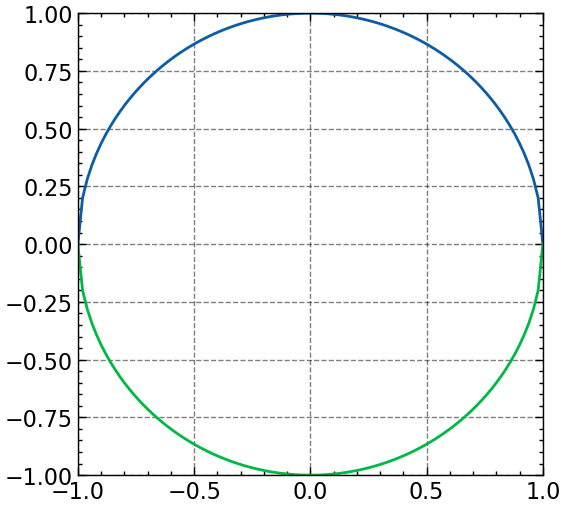

In [15]:
x = np.linspace(-1, 1, 100)
y1 = np.sqrt(1.0 - x**2)
y2 = -np.sqrt(1.0 - x**2)
fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.plot(x, y1)
ax.plot(x, y2)

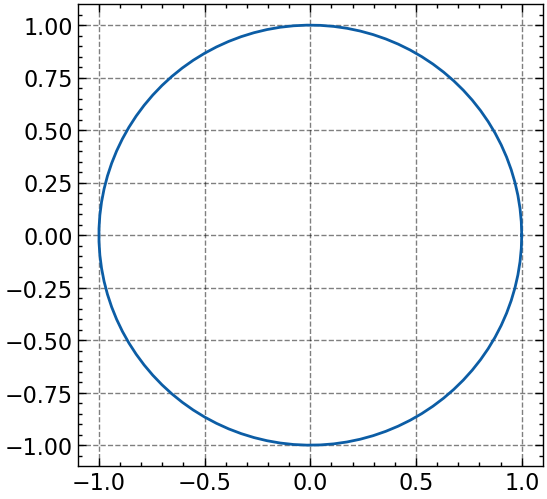

In [21]:
# plot ประจุรูปวงกลมโดยใช้ parameter t
t = np.linspace(0, 2 * np.pi, 100)
x = 1.0 * np.cos(t)
y = 1.0 * np.sin(t)

fig = plt.figure(figsize=(6, 6))
ax = plt.axes()
ax.plot(x, y)

## สนามไฟฟ้าจากประจุรูปแบบใด ๆ
$$\mathbf{dE}=\frac{dq}{4\pi\epsilon_0}\frac{\mathbf{r-r'}}{|\mathbf{r-r'}|^3}$$
$$\mathbf{E(r)}=\int\mathbf{dE}$$

Line Charge Definition
$$dq=\rho_l(r')d\mathbf{r'}$$

Parameterised
$$dq=\rho_l(r')\left\|\frac{d\mathbf{r'}}{dt}\right\|dt$$

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

หาสนามไฟฟ้าเนื่องจากประจุแบบวงกลม รัศมี $2.5~cm$ ที่มีประจุรวม $Q=1~\mu C$ 

In [25]:
Q = 1e-6
radius = 2.5e-2
rho_l = Q / (2 * np.pi * radius)
rho_l

6.366197723675813e-06

In [28]:
x, y, t = smp.symbols('x y t', real=True)
r = smp.Matrix([x, y])
rp = smp.Matrix([radius * smp.cos(t),
                radius * smp.sin(t)])
R = r - rp
R

Matrix([
[x - 0.025*cos(t)],
[y - 0.025*sin(t)]])

In [31]:
smp.diff(rp, t).norm()

0.025*sqrt(sin(t)**2 + cos(t)**2)

In [37]:
dqdt = rho_l * smp.diff(rp, t).norm()
dqdt = dqdt.simplify()

In [42]:
dEdt = dqdt / (4 * pi * epsilon_0) * R / R.norm()**3
dEdt

Matrix([
[(1430.41329403279*x - 35.7603323508197*cos(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)],
[(1430.41329403279*y - 35.7603323508197*sin(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)]])

In [43]:
# Integrate
smp.integrate(dEdt, [t, 0, 2 * pi])


KeyboardInterrupt



Symbolic Integration หาคำตอบไม่ได้ ดังนั้น ควรใช้ Numerical Integration

In [46]:
dEdt

Matrix([
[(1430.41329403279*x - 35.7603323508197*cos(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)],
[(1430.41329403279*y - 35.7603323508197*sin(t))/((x - 0.025*cos(t))**2 + (y - 0.025*sin(t))**2)**(3/2)]])

In [57]:
dExdt = smp.lambdify([t, x, y], dEdt[0])
dEydt = smp.lambdify([t, x, y], dEdt[1])
dExdt(2.5, 1, 2)

131.25645006695243

In [53]:
def f(x):
    return np.sin(x)

quad(f, 0, 2 * pi)

(2.221501482512777e-16, 4.3998892617845996e-14)

In [60]:
def E(x, y):
    Ex = quad(dExdt, 0, 2 * pi, args=(x, y))[0]
    Ey = quad(dEydt, 0, 2 * pi, args=(x, y))[0]
    return np.array([Ex, Ey])

In [61]:
E(1, 2)

array([ 803.9464421 , 1607.89288419])

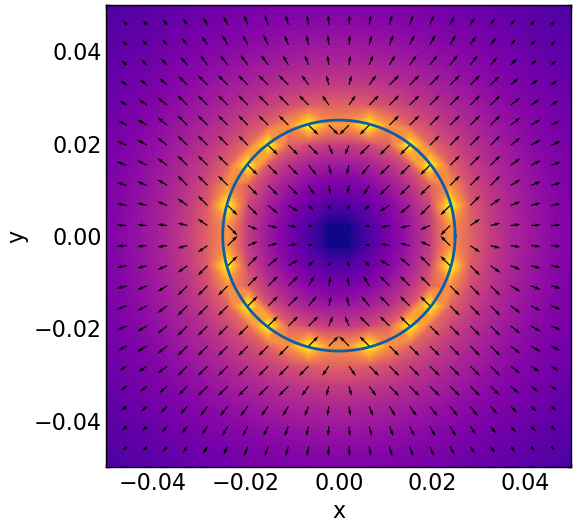

In [71]:
fig = plt.figure(figsize=(6, 6))
ax = field_plot(E, x_min=-5e-2, x_max=5e-2, y_min=-5e-2, y_max=5e-2, num_grids=24, contour=True)

t = np.linspace(0, 2 * pi, 100)
X = 2.5e-2 * np.cos(t)
Y = 2.5e-2 * np.sin(t)
ax.plot(X, Y)

สนามไฟฟ้าเนื่องจากประจุรูปวงกลมศูนย์กลางร่วมที่มีรัศมี $5~cm$ และ $4~cm$ ตามลำดับ โดยที่ประจุตัวในมีขนาด $1~\mu C$ และประจุตัวนอกมีขนาด $-1~\mu C$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

### กฎของเกาส์ (Gauss's Law)

$$\oint\mathbf{D}\cdot\mathbf{ds}=Q_{encl}$$

สำหรับระบบพิกัดทรงกระบอก (Cylindrical Coordinate System)
$$\mathbf{D}=D_\rho\mathbf{a_\rho}+D_\phi\mathbf{a_\phi}+D_z\mathbf{a_z}$$
และ
$$\mathbf{ds}=d\rho\mathbf{a_\rho}+\rho d\phi\mathbf{a_\phi}+dz\mathbf{a_z}$$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from libemag.emag_initials import *
from libemag.plots import field_plot
import sympy as smp

สำหรับประจุแบบท่อตัวนำแกนร่วม (Coaxcial Charge) ที่มีประจุด้านในและนอกเป็น $Q$ และ $-Q$ ตามลำดับ และมีรัศมี ณ ตำแหน่งต่าง ๆ เป็น $\rho_1, \rho_2$ และ $\rho_3$
